In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.optimize import curve_fit

from astropy.io import fits
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")

In [3]:
speclist = ['b', 'r', 'z']
fname = '/global/cfs/cdirs/desi/users/dfink/stars-darktime-'
data = {}

for spec in speclist:
    data[spec] = bfiles = fits.open(fname + spec + ".fits")

# Show one example of model vs data

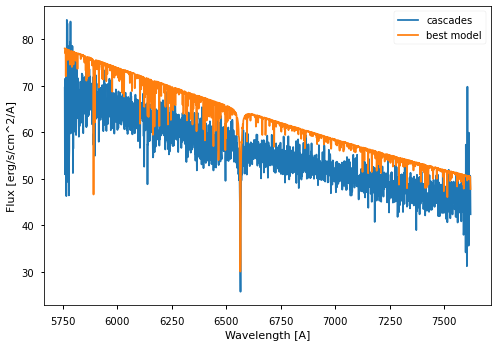

In [5]:
i = 10
plt.plot(data['r'][1].data['WAVE'][i], data['r'][1].data['SPEC'][i], label = 'cascades')
plt.plot(data['r'][1].data['WAVE'][i], data['r'][1].data['MODELSPEC'][i], label = 'best model')
plt.xlabel("Wavelength [A]")
plt.ylabel("Flux [erg/s/cm^2/A]")
plt.legend(loc = 'best')

## Flux calibration 

Define, calibration factor, $CF$ as:

\begin{equation}
CF = avg\left(linregWeighted\left(\frac{Data}{Model}\right)\right)
\end{equation}

Also define, calibration factor based on median, $CF2$ as:

\begin{equation}
CF2 = median\left(linregWeighted\left(\frac{Data}{Model}\right)\right)
\end{equation}

In [6]:
def f(x, m, b):
    """Linear function"""
    return m * x + b

p0 = 1, 0 #initial guess that the data and model are perfectly calibrated

def calculate_cal_factor(idx, band):
    """Returns the calibration factor CF and CF2 based for a given 
    spectra.
    
    Input
    -----
        idx : index in the input file
        band : 'b', 'r' or 'z'; signifies wavelength band of the spectra
    Returns:
    --------
        CF : calibration factor based on average
        CF2 : calibration factor based on median"""
    
    # Weighted fit
    x = data[band][1].data['WAVE'][idx] #wavelength axis
    y_obs = data[band][1].data['SPEC'][idx]/data[band][1].data['MODELSPEC'][idx]
    sigma = 1/np.sqrt(data[band][1].data['IVAR'][idx])
    
    popt2, pcov2 = curve_fit(f, x, y_obs, p0, sigma = sigma, absolute_sigma=True)
    yfit_weighted = f(x, *popt2)
    
    return np.mean(yfit_weighted), np.median(yfit_weighted)

In [7]:
nspec = len(data['r'][1].data) #number of spectra

#mean
cal_factors_b = np.zeros(nspec)
cal_factors_r = np.zeros(nspec)
cal_factors_z = np.zeros(nspec)

#median
cal_factors_b_med = np.zeros(nspec)
cal_factors_r_med = np.zeros(nspec)
cal_factors_z_med = np.zeros(nspec)

for idx in range(nspec):
    cal_factors_b[idx], cal_factors_b_med[idx] = calculate_cal_factor(idx, 'b')
    cal_factors_r[idx], cal_factors_r_med[idx] = calculate_cal_factor(idx, 'r')
    cal_factors_z[idx], cal_factors_z_med[idx] = calculate_cal_factor(idx, 'z')

<ipython-input-6-6fb58c656887>:23: RuntimeWarning: divide by zero encountered in true_divide
  sigma = 1/np.sqrt(data[band][1].data['IVAR'][idx])
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-6-6fb58c656887>:22: RuntimeWarning: invalid value encountered in true_divide
  y_obs = data[band][1].data['SPEC'][idx]/data[band][1].data['MODELSPEC'][idx]


ValueError: array must not contain infs or NaNs

**Note:** code breaking at `idx == 10299` because of NaNs

In [ ]:
calculate_cal_factor(idx, 'r')

In [ ]:
idx = 10299; band = 'r'
tmpy = data[band][1].data['SPEC'][idx]/data[band][1].data['MODELSPEC'][idx]

tmpy

**Note:** Further inspection shows that both the `SPEC` and `MODELSPEC` are $0$. This should not happen.

In [22]:
data['r'][1].data['WAVE'][idx]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

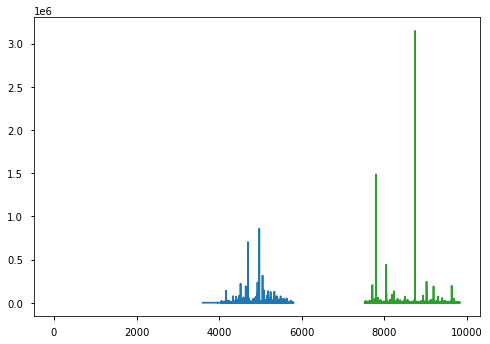

In [18]:
idx = 10299
plt.plot(data['b'][1].data['WAVE'][idx], data['b'][1].data['SPEC'][idx])
#plt.plot(data['b'][1].data['WAVE'][idx], data['b'][1].data['MODELSPEC'][idx])
plt.plot(data['r'][1].data['WAVE'][idx], data['r'][1].data['SPEC'][idx])
#plt.plot(data['r'][1].data['WAVE'][idx], data['r'][1].data['MODELSPEC'][idx])
plt.plot(data['z'][1].data['WAVE'][idx], data['z'][1].data['SPEC'][idx])
#plt.plot(data['z'][1].data['WAVE'][idx], data['z'][1].data['MODELSPEC'][idx])
#plt.ylim([0, 10000])

**Note:** Futher inspection of the spectra suggests that this is not a star? Also the wavelength grid is also $0$ in `r` band.

In [9]:
data['b'][1].data['SPEC'][idx]

array([100.720436,  95.5325  ,  67.19154 , ...,  81.9303  ,  85.88355 ,
       158.65762 ], dtype=float32)

In [ ]:
data['b'][1].data['TARGETID'][idx]

In [92]:
data['r'][1].data['TARGETID'][idx]

39627688754810420

In [81]:
data['z'][1].data['TARGETID'][idx]

39627706857430933

**Note:** Seems that the indices are mismatched? for the same idx, the `b` and `z` `TARGETID` for this object is different from `TARGETID` shown under `r`